In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("./data/Mall_Customers.csv")

data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
data.rename(columns={"Annual Income (k$)": "Annual Income Dollar"}, inplace=True)

In [9]:
data.head()

,CustomerID,Genre,Age,Annual Income Dollar,Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Visualization

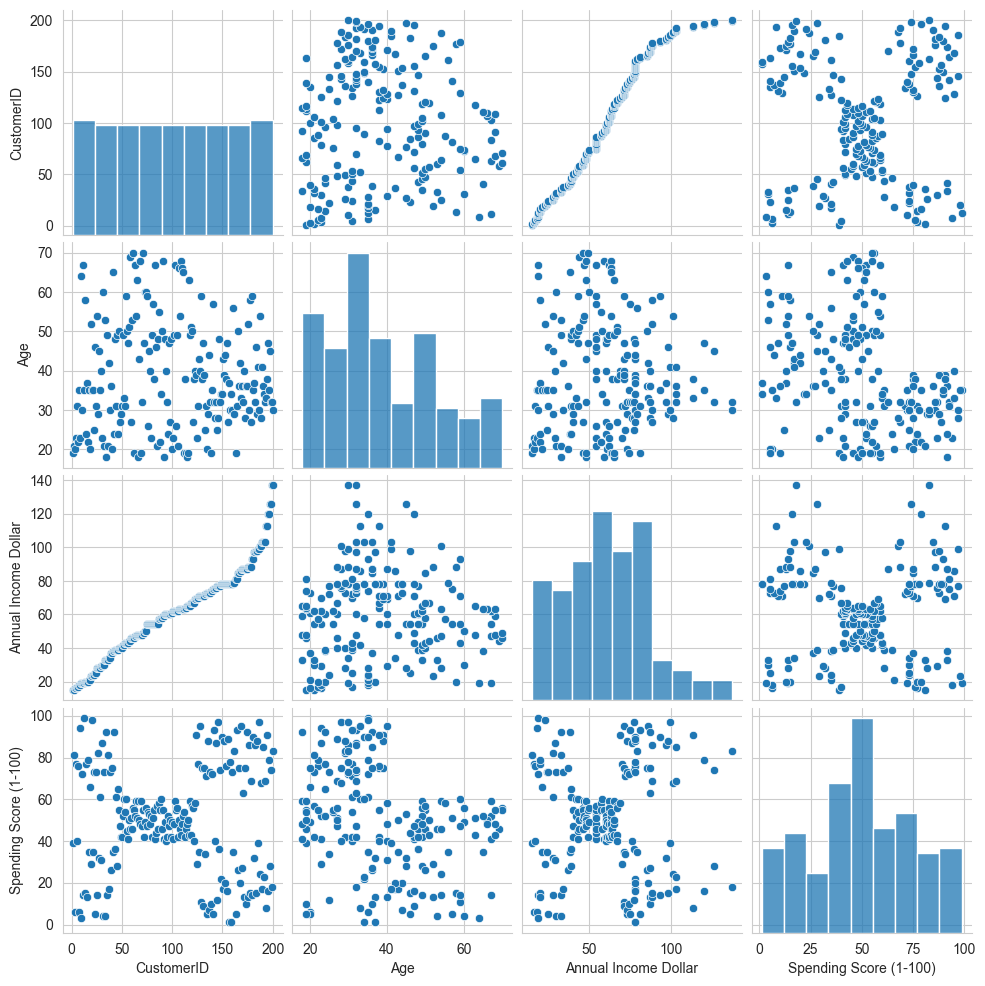

In [10]:
sns.pairplot(data)
plt.show()

### Feature Selection

In [11]:
# Annual Income Dollar and Spending Score (1-100)
X = data[["Annual Income Dollar", "Spending Score (1-100)"]]

In [12]:
# Scaling the datas as clustering is distance based
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
X_scaled

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

### Elbow Method (Finding Optimal Clusters)

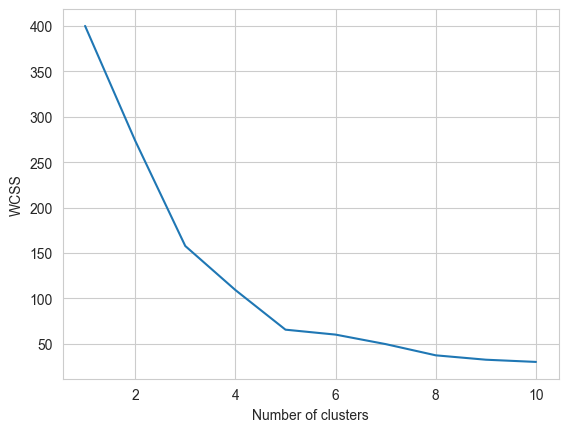

In [14]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

## Applying K-Means

In [15]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

data["Cluster"] = clusters

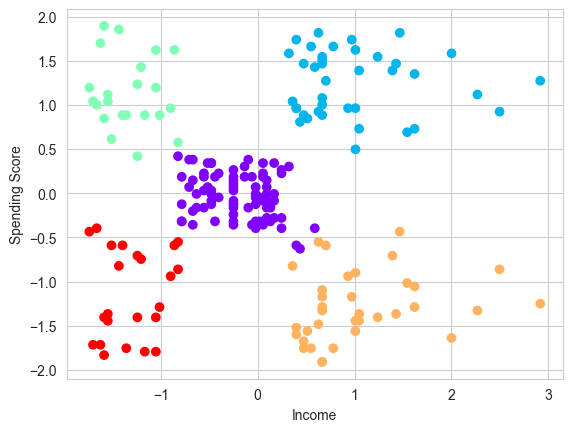

In [16]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap="rainbow")
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.show()

## PCA ( Principal Component Analysis)

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [20]:
X_pca

array([[-1.53710920e+00, -9.22207047e-01],
       [-3.84167666e-01, -2.07514858e+00],
       [-2.41600197e+00,  1.06654468e-02],
       [-4.66981759e-01, -1.93835476e+00],
       [-1.45567848e+00, -8.95678311e-01],
       [-4.67442886e-01, -1.88391391e+00],
       [-2.36202224e+00,  6.46451712e-02],
       [ 5.36647757e-02, -2.35104185e+00],
       [-2.41738535e+00,  1.73988000e-01],
       [-5.23267116e-01, -1.72013023e+00],
       [-2.11542447e+00, -1.27972877e-01],
       [ 2.17909582e-01, -2.46130693e+00],
       [-2.06098362e+00, -1.28434004e-01],
       [-3.59022310e-01, -1.83039531e+00],
       [-2.11588560e+00, -7.35320262e-02],
       [-3.04120332e-01, -1.88529729e+00],
       [-1.48497398e+00, -6.50463918e-01],
       [-6.33993325e-01, -1.50144457e+00],
       [-1.59570019e+00, -4.31778261e-01],
       [ 2.98418042e-01, -2.32589649e+00],
       [-1.40400439e+00, -5.69494332e-01],
       [-3.60866817e-01, -1.61263191e+00],
       [-2.20054420e+00,  2.81025195e-01],
       [-3.

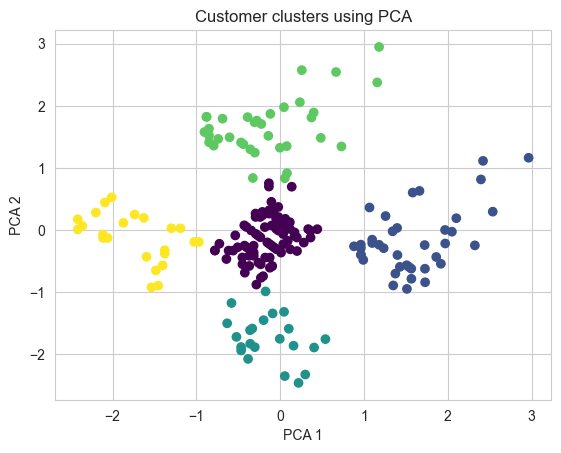

In [19]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="viridis")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Customer clusters using PCA")
plt.show()

## DBScan (Density Based Clustering)

In [25]:
from sklearn.cluster import DBSCAN

In [26]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
db_clusters = dbscan.fit_predict(X_scaled)

data["DBSCAN_Cluster"] = db_clusters

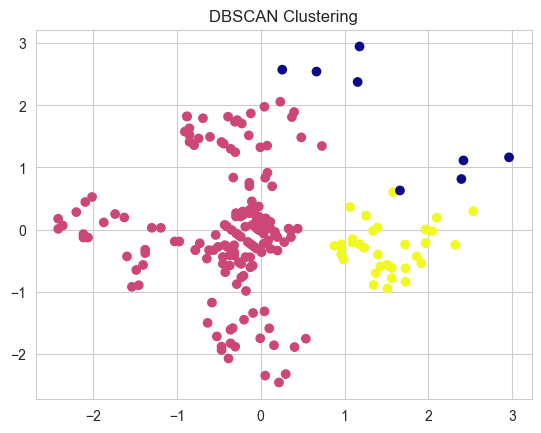

In [27]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=db_clusters, cmap='plasma')
plt.title("DBSCAN Clustering")
plt.show()


### Performance Comparision

In [28]:
from sklearn.metrics import silhouette_score

kmeans_score = silhouette_score(X_scaled, clusters)
dbscan_score = silhouette_score(X_scaled, db_clusters)

print("KMeans Score: ", kmeans_score)
print("DBScan Score: ", dbscan_score)

KMeans Score:  0.5546571631111091
DBScan Score:  0.35044619989666004
